<a href="https://colab.research.google.com/github/abhirami-thapasya/-Failure-Prediction-of-3D-Metal-Prints/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear** **Regression**

Mean squared error: 0.000058126


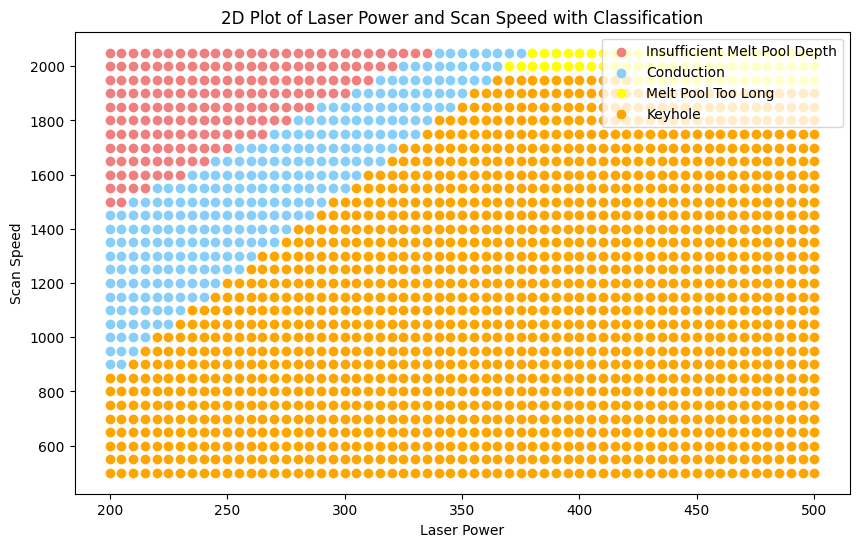

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import itertools

from mpl_toolkits.mplot3d import Axes3D

dataset=pd.read_csv("/content/sample_data/n.csv")

# Accessing input variables
x1 = dataset.iloc[:, 0].values
x2 = dataset.iloc[:, 1].values
x3 = dataset.iloc[:, 2].values

# Accessing output variables
y1 = dataset.iloc[:, 3].values
y2 = dataset.iloc[:, 4].values
y3 = dataset.iloc[:, 5].values

# Concatenate the input variables into one array
x = np.column_stack((x1, x2, x3))

# Concatenate the output variables into one array
y = np.column_stack((y1, y2, y3))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

#calling model
lin_reg=linear_model.LinearRegression()

#fitting data in the model
lin_reg.fit(x_train,y_train)

#making predictions
lin_reg_pred=lin_reg.predict(x_test)

#the mean squared error
print("Mean squared error: %.9f" % mean_squared_error(y_test,lin_reg_pred))

# Load the new test data
test_data = pd.read_csv("/content/sample_data/test1.csv")

# Accessing input variables from the test data
test_x1 = test_data.iloc[:, 0].values
test_x2 = test_data.iloc[:, 1].values
test_x3 = test_data.iloc[:, 2].values

# Concatenate the input variables into one array
test_x = np.column_stack((test_x1, test_x2, test_x3))

# Make predictions on the test data
predicted_output = lin_reg.predict(test_x)

# Extract individual predicted values
predicted_depth = predicted_output[:, 0]
predicted_length = predicted_output[:, 1]
predicted_width = predicted_output[:, 2]

# Create DataFrame with new input parameters and predicted melt pool dimensions
new_data = pd.DataFrame({
    'Laser Power': test_data['Laser Power'].values,
    'Scan Speed': test_data['Scan Speed'].values,
    'Layer Thickness': test_data['Layer Thickness'].values,
    'Predicted Depth': predicted_output[:, 0],  # Predicted melt pool depth
    'Predicted Length': predicted_output[:, 1],  # Predicted melt pool length
    'Predicted Width': predicted_output[:, 2]  # Predicted melt pool width
})

colors = {'Insufficient Melt Pool Depth': 'lightcoral', 'Conduction': 'lightskyblue', 'Melt Pool Too Long': 'yellow', 'Keyhole': 'orange'}

# Classify each data point
classifications = []
for i in range(len(test_data)):
    layer_thickness = test_data.iloc[i]['Layer Thickness']
    # Check if Average Melt Pool Reference Depth > 2500 times Actual Layer Thickness
    if predicted_depth[i] / layer_thickness < 0.0025:
        classifications.append("Insufficient Melt Pool Depth")
    else:
        # Calculate the ratio of Average Melt Pool Depth to Average Melt Pool Width
        depth_to_width_ratio = predicted_depth[i] / predicted_width[i]

        # Check the ratio for further classification
        if depth_to_width_ratio < 0.5:
            classifications.append("Conduction")
        else:
            # Check length/width of melt pool > 2*pi
            if predicted_length[i] / predicted_width[i] > 2 * np.pi:
                classifications.append("Melt Pool Too Long")
            else:
                # Add additional criteria here if needed
                classifications.append("Keyhole")

# Add classification to the test data DataFrame
test_data['Classification'] = classifications

# Create a 2D plot
plt.figure(figsize=(10, 6))

# Plot each point with its classification color
for i in range(len(test_data)):
    # Extract data for the current point
    current_layer_thickness = test_data.iloc[i]['Layer Thickness']
    current_laser_power = test_data.iloc[i]['Laser Power']
    current_scan_speed = test_data.iloc[i]['Scan Speed']
    current_classification = test_data.iloc[i]['Classification']

    # Plot the point with the corresponding color
    plt.scatter(current_laser_power, current_scan_speed, color=colors[current_classification])

# Set labels for axes
plt.xlabel('Laser Power')
plt.ylabel('Scan Speed')

# Set title for the plot
plt.title('2D Plot of Laser Power and Scan Speed with Classification')

# Show legend with color labels
for classification, color in colors.items():
    plt.scatter([], [], color=color, label=classification)
plt.legend()

# Show the plot
plt.show()



**Decision Tree**

Decision Tree Mean squared error: 0.000011225


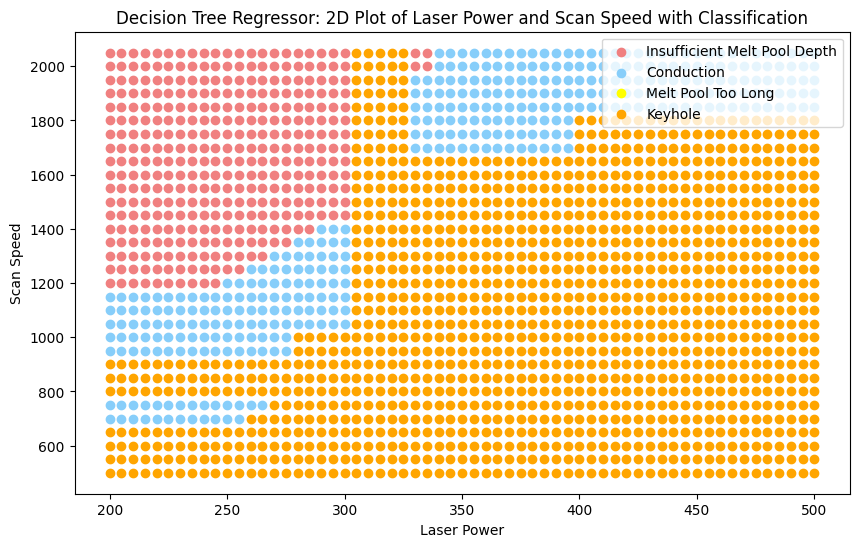

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
dataset = pd.read_csv("/content/sample_data/n.csv")

# Accessing input variables
x1 = dataset.iloc[:, 0].values
x2 = dataset.iloc[:, 1].values
x3 = dataset.iloc[:, 2].values

# Accessing output variables
y1 = dataset.iloc[:, 3].values
y2 = dataset.iloc[:, 4].values
y3 = dataset.iloc[:, 5].values

# Concatenate the input variables into one array
x = np.column_stack((x1, x2, x3))

# Concatenate the output variables into one array
y = np.column_stack((y1, y2, y3))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

# Create a Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor()

# Fitting data into the model
dt_regressor.fit(x_train, y_train)

# Making predictions
dt_pred = dt_regressor.predict(x_test)

# The mean squared error
print("Decision Tree Mean squared error: %.9f" % mean_squared_error(y_test, dt_pred))

# Load the new test data
test_data = pd.read_csv("/content/sample_data/test1.csv")

# Accessing input variables from the test data
test_x1 = test_data.iloc[:, 0].values
test_x2 = test_data.iloc[:, 1].values
test_x3 = test_data.iloc[:, 2].values

# Concatenate the input variables into one array
test_x = np.column_stack((test_x1, test_x2, test_x3))

# Make predictions on the test data
dt_predicted_output = dt_regressor.predict(test_x)

# Extract individual predicted values
dt_predicted_depth = dt_predicted_output[:, 0]
dt_predicted_length = dt_predicted_output[:, 1]
dt_predicted_width = dt_predicted_output[:, 2]

# Create DataFrame with new input parameters and predicted melt pool dimensions
dt_new_data = pd.DataFrame({
    'Laser Power': test_data['Laser Power'].values,
    'Scan Speed': test_data['Scan Speed'].values,
    'Layer Thickness': test_data['Layer Thickness'].values,
    'Predicted Depth': dt_predicted_depth,  # Predicted melt pool depth
    'Predicted Length': dt_predicted_length,  # Predicted melt pool length
    'Predicted Width': dt_predicted_width  # Predicted melt pool width
})

colors = {'Insufficient Melt Pool Depth': 'lightcoral', 'Conduction': 'lightskyblue', 'Melt Pool Too Long': 'yellow', 'Keyhole': 'orange'}

# Classify each data point using Decision Tree Regressor predictions
dt_classifications = []
for i in range(len(test_data)):
    layer_thickness = test_data.iloc[i]['Layer Thickness']
    # Check if Average Melt Pool Reference Depth > 2500 times Actual Layer Thickness
    if dt_predicted_depth[i] / layer_thickness < 0.0025:
        dt_classifications.append("Insufficient Melt Pool Depth")
    else:
        # Calculate the ratio of Average Melt Pool Depth to Average Melt Pool Width
        dt_depth_to_width_ratio = dt_predicted_depth[i] / dt_predicted_width[i]

        # Check the ratio for further classification
        if dt_depth_to_width_ratio < 0.5:
            dt_classifications.append("Conduction")
        else:
            # Check length/width of melt pool > 2*pi
            if dt_predicted_length[i] / dt_predicted_width[i] > 2 * np.pi:
                dt_classifications.append("Melt Pool Too Long")
            else:
                # Add additional criteria here if needed
                dt_classifications.append("Keyhole")

# Add classification to the test data DataFrame
test_data['DecisionTreeClassification'] = dt_classifications

# Create a 2D plot for Decision Tree Regressor
plt.figure(figsize=(10, 6))

# Plot each point with its classification color
for i in range(len(test_data)):
    # Extract data for the current point
    dt_current_layer_thickness = test_data.iloc[i]['Layer Thickness']
    dt_current_laser_power = test_data.iloc[i]['Laser Power']
    dt_current_scan_speed = test_data.iloc[i]['Scan Speed']
    dt_current_classification = test_data.iloc[i]['DecisionTreeClassification']

    # Plot the point with the corresponding color
    plt.scatter(dt_current_laser_power, dt_current_scan_speed, color=colors[dt_current_classification])

# Set labels for axes
plt.xlabel('Laser Power')
plt.ylabel('Scan Speed')

# Set title for the plot
plt.title('Decision Tree Regressor: 2D Plot of Laser Power and Scan Speed with Classification')

# Show legend with color labels
for dt_classification, dt_color in colors.items():
    plt.scatter([], [], color=dt_color, label=dt_classification)
plt.legend()

# Show the plot
plt.show()


**Random Forest Regression**

Mean squared error: 7.575053527828285e-06


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


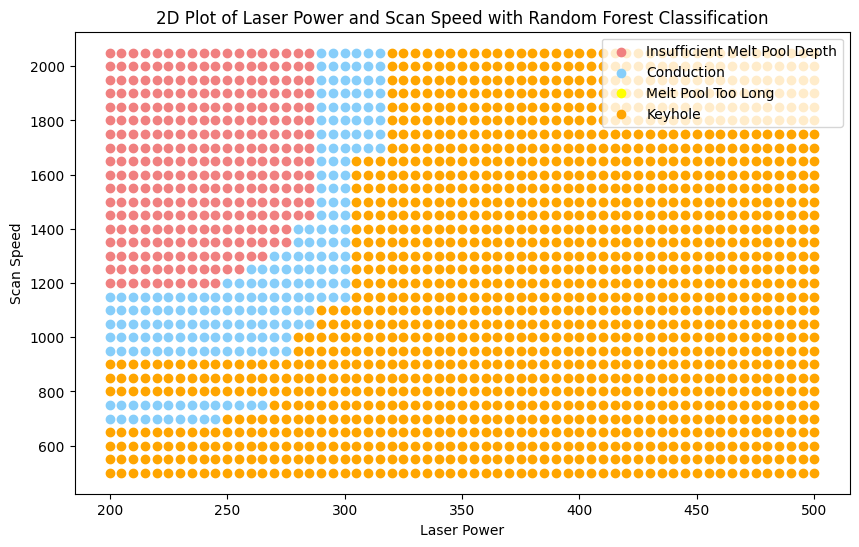

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load the data
file_path = '/content/sample_data/n.csv'
data = pd.read_csv(file_path)

# Extracting input and output variables
X = data[['Laser Power', 'Scan Speed', 'Layer Thickness']]
y_columns = ['Median Melt Pool Reference Depth', 'Median Melt Pool Length', 'Median Melt Pool Reference Width']
y = data[y_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=0)

# Fit the model
rf_regressor.fit(X_train, y_train)

# Make predictions
rf_pred = rf_regressor.predict(X_test)

# Calculate mean squared error
print("Mean squared error:", mean_squared_error(y_test, rf_pred))

# Load the new test data
test_data = pd.read_csv("/content/sample_data/test1.csv")

# Make predictions on the test data
rf_predicted_output = rf_regressor.predict(test_data[['Laser Power', 'Scan Speed' , 'Layer Thickness']].values)

# Create DataFrame with new input parameters and predicted melt pool dimensions
new_data_rf = pd.DataFrame({
    'Laser Power': test_data['Laser Power'].values,
    'Scan Speed': test_data['Scan Speed'].values,
    'Layer Thickness': test_data['Layer Thickness'].values,
    'Predicted Depth': rf_predicted_output[:, 0],  # Predicted melt pool depth
    'Predicted Length': rf_predicted_output[:, 1],  # Predicted melt pool length
    'Predicted Width': rf_predicted_output[:, 2]  # Predicted melt pool width
})

# Classify each data point
rf_classifications = []
for i in range(len(test_data)):
    layer_thickness = test_data.iloc[i]['Layer Thickness']
    # Check if Average Melt Pool Reference Depth > 2500 times Actual Layer Thickness
    if rf_predicted_output[i, 0] / layer_thickness < 0.0025:
        rf_classifications.append("Insufficient Melt Pool Depth")
    else:
        # Calculate the ratio of Average Melt Pool Depth to Average Melt Pool Width
        depth_to_width_ratio = rf_predicted_output[i, 0] / rf_predicted_output[i, 2]

        # Check the ratio for further classification
        if depth_to_width_ratio < 0.5:
            rf_classifications.append("Conduction")
        else:
            # Check length/width of melt pool > 2*pi
            if rf_predicted_output[i, 1] / rf_predicted_output[i, 2] > 2 * np.pi:
                rf_classifications.append("Melt Pool Too Long")
            else:
                # Add additional criteria here if needed
                rf_classifications.append("Keyhole")

# Add classification to the test data DataFrame
test_data['Classification'] = rf_classifications

# Plotting
plt.figure(figsize=(10, 6))
colors = {'Insufficient Melt Pool Depth': 'lightcoral', 'Conduction': 'lightskyblue',
          'Melt Pool Too Long': 'yellow', 'Keyhole': 'orange'}

# Plot each point with its classification color
for i in range(len(test_data)):
    current_classification = test_data.iloc[i]['Classification']
    plt.scatter(test_data.iloc[i]['Laser Power'], test_data.iloc[i]['Scan Speed'], color=colors[current_classification])

# Set labels for axes
plt.xlabel('Laser Power')
plt.ylabel('Scan Speed')

# Set title for the plot
plt.title('2D Plot of Laser Power and Scan Speed with Random Forest Classification')

# Show legend with color labels
for classification, color in colors.items():
    plt.scatter([], [], color=color, label=classification)
plt.legend()

# Show the plot
plt.show()


**Gradient Boosting**

Gradient Boosting Mean squared error for Depth: 0.000002735
Gradient Boosting Mean squared error for Length: 0.000019966
Gradient Boosting Mean squared error for Width: 0.000001440


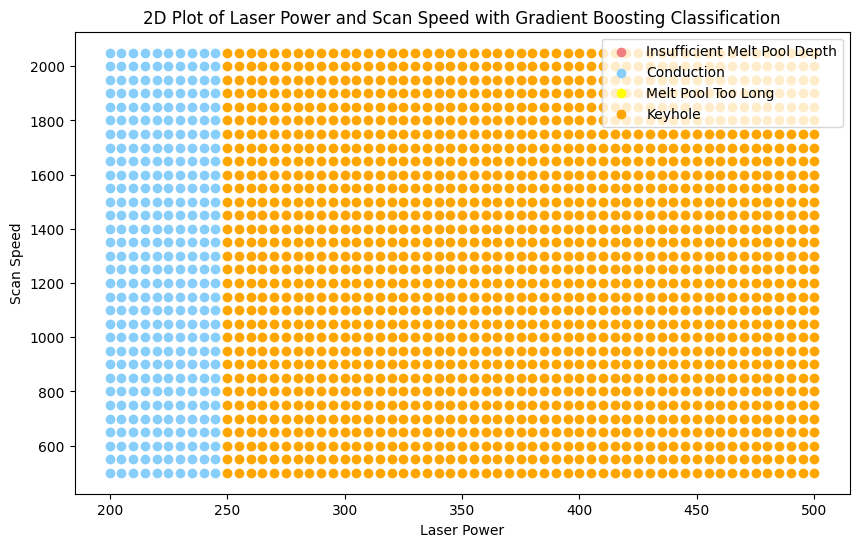

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

from mpl_toolkits.mplot3d import Axes3D

dataset=pd.read_csv("/content/sample_data/n.csv")

# Accessing input variables
x1 = dataset.iloc[:, 0].values
x2 = dataset.iloc[:, 1].values
x3 = dataset.iloc[:, 2].values

# Accessing output variables
y1 = dataset.iloc[:, 3].values
y2 = dataset.iloc[:, 4].values
y3 = dataset.iloc[:, 5].values

# Concatenate the input variables into one array
x = np.column_stack((x1, x2, x3))

# Concatenate the output variables into one array
y = np.column_stack((y1, y2, y3))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

# Convert each output column to a 1D array
y1_train_1d = y_train[:, 0]
y2_train_1d = y_train[:, 1]
y3_train_1d = y_train[:, 2]

y1_test_1d = y_test[:, 0]
y2_test_1d = y_test[:, 1]
y3_test_1d = y_test[:, 2]

# Create Gradient Boosting Regressors for each output variable
gb_regressor_depth = GradientBoostingRegressor(random_state=0)
gb_regressor_length = GradientBoostingRegressor(random_state=0)
gb_regressor_width = GradientBoostingRegressor(random_state=0)

# Fitting data into each model
gb_regressor_depth.fit(x_train, y1_train_1d)
gb_regressor_length.fit(x_train, y2_train_1d)
gb_regressor_width.fit(x_train, y3_train_1d)

# Making predictions for each model
gb_pred_depth = gb_regressor_depth.predict(x_test)
gb_pred_length = gb_regressor_length.predict(x_test)
gb_pred_width = gb_regressor_width.predict(x_test)

# Calculate mean squared error for each output variable
mse_depth = mean_squared_error(y1_test_1d, gb_pred_depth)
mse_length = mean_squared_error(y2_test_1d, gb_pred_length)
mse_width = mean_squared_error(y3_test_1d, gb_pred_width)

print("Gradient Boosting Mean squared error for Depth: %.9f" % mse_depth)
print("Gradient Boosting Mean squared error for Length: %.9f" % mse_length)
print("Gradient Boosting Mean squared error for Width: %.9f" % mse_width)

# Calculate mean squared error for all three output variables combined
mse_general = mean_squared_error(np.hstack((y1_test_1d, y2_test_1d, y3_test_1d)),
                                 np.hstack((gb_pred_depth, gb_pred_length, gb_pred_width)))

# print("General Gradient Boosting Mean squared error: %.9f" % mse_general)

# # Load the new test data
# test_data = pd.read_csv("/content/sample_data/test.csv")

# Make predictions on the test data
gb_pred_depth_output = gb_regressor_depth.predict(test_data[['Laser Power', 'Scan Speed','Layer Thickness']].values)
gb_pred_length_output = gb_regressor_length.predict(test_data[['Laser Power', 'Scan Speed','Layer Thickness']].values)
gb_pred_width_output = gb_regressor_width.predict(test_data[['Laser Power', 'Scan Speed','Layer Thickness']].values)

# Create DataFrame with new input parameters and predicted melt pool dimensions
new_data_gb = pd.DataFrame({
    'Laser Power': test_data['Laser Power'].values,
    'Scan Speed': test_data['Scan Speed'].values,
    'Layer Thickness': test_data['Layer Thickness'].values,
    'Predicted Depth': gb_pred_depth_output,  # Predicted melt pool depth
    'Predicted Length': gb_pred_length_output,  # Predicted melt pool length
    'Predicted Width': gb_pred_width_output  # Predicted melt pool width
})

# Classify each data point
gb_classifications = []
for i in range(len(test_data)):
    layer_thickness = test_data.iloc[i]['Layer Thickness']
    # Check if Average Melt Pool Reference Depth > 2500 times Actual Layer Thickness
    if new_data_gb['Predicted Depth'].iloc[i] / layer_thickness < 0.0025:
        gb_classifications.append("Insufficient Melt Pool Depth")
    else:
        # Calculate the ratio of Average Melt Pool Depth to Average Melt Pool Width
        depth_to_width_ratio = new_data_gb['Predicted Depth'].iloc[i] / new_data_gb['Predicted Width'].iloc[i]

        # Check the ratio for further classification
        if depth_to_width_ratio < 0.5:
            gb_classifications.append("Conduction")
        else:
            # Check length/width of melt pool > 2*pi
            if new_data_gb['Predicted Length'].iloc[i] / new_data_gb['Predicted Width'].iloc[i] > 2 * np.pi:
                gb_classifications.append("Melt Pool Too Long")
            else:
                # Add additional criteria here if needed
                gb_classifications.append("Keyhole")

# Add classification to the test data DataFrame
#test_data['Classification'] = gb_classifications
new_data_gb['Classification'] = gb_classifications

# Plotting
plt.figure(figsize=(10, 6))
colors = {'Insufficient Melt Pool Depth': 'lightcoral', 'Conduction': 'lightskyblue',
          'Melt Pool Too Long': 'yellow', 'Keyhole': 'orange'}

# Plot each point with its classification color
for i in range(len(test_data)):
    current_classification = new_data_gb.iloc[i]['Classification']
    plt.scatter(new_data_gb.iloc[i]['Laser Power'], new_data_gb.iloc[i]['Scan Speed'], color=colors[current_classification])

# Set labels for axes
plt.xlabel('Laser Power')
plt.ylabel('Scan Speed')

# Set title for the plot
plt.title('2D Plot of Laser Power and Scan Speed with Gradient Boosting Classification')

# Show legend with color labels
for classification, color in colors.items():
    plt.scatter([], [], color=color, label=classification)
plt.legend()

# Show the plot
plt.show()

Support Vector Machines

SVM Mean squared error for Depth: 0.000431453
SVM Mean squared error for Length: 0.002322892
SVM Mean squared error for Width: 0.000558525
General SVM Mean squared error: 0.001104290


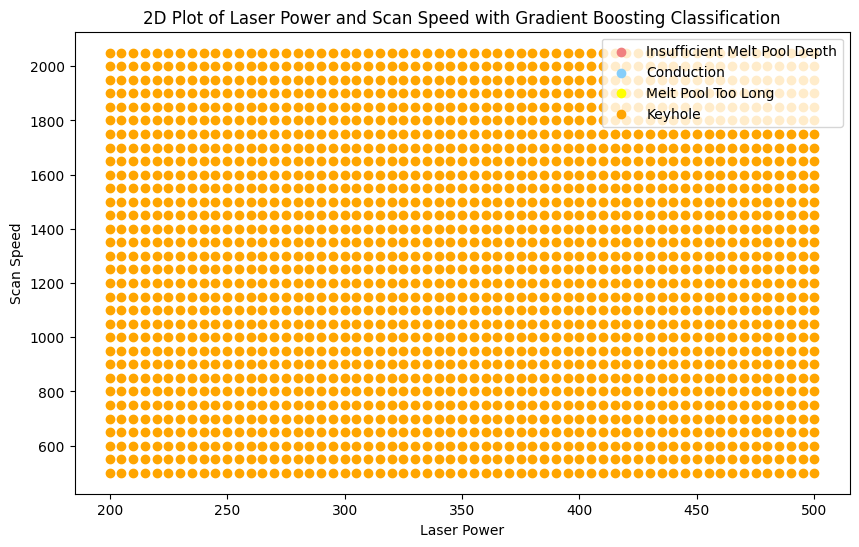

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Load the dataset
dataset = pd.read_csv("/content/sample_data/n.csv")

# Accessing input variables
x1 = dataset.iloc[:, 0].values
x2 = dataset.iloc[:, 1].values
x3 = dataset.iloc[:, 2].values

# Accessing output variables
y1 = dataset.iloc[:, 3].values
y2 = dataset.iloc[:, 4].values
y3 = dataset.iloc[:, 5].values

# Concatenate the input variables into one array
x = np.column_stack((x1, x2, x3))

# Concatenate the output variables into one array
y = np.column_stack((y1, y2, y3))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

# Convert each output column to a 1D array
y1_train_1d = y_train[:, 0]
y2_train_1d = y_train[:, 1]
y3_train_1d = y_train[:, 2]

y1_test_1d = y_test[:, 0]
y2_test_1d = y_test[:, 1]
y3_test_1d = y_test[:, 2]

# Create Support Vector Machines for each output variable
svm_regressor_depth = SVR(kernel='linear')
svm_regressor_length = SVR(kernel='linear')
svm_regressor_width = SVR(kernel='linear')

# Fitting data into each model
svm_regressor_depth.fit(x_train, y1_train_1d)
svm_regressor_length.fit(x_train, y2_train_1d)
svm_regressor_width.fit(x_train, y3_train_1d)

# Making predictions for each model
svm_pred_depth = svm_regressor_depth.predict(x_test)
svm_pred_length = svm_regressor_length.predict(x_test)
svm_pred_width = svm_regressor_width.predict(x_test)

# Calculate mean squared error for each output variable
mse_depth = mean_squared_error(y1_test_1d, svm_pred_depth)
mse_length = mean_squared_error(y2_test_1d, svm_pred_length)
mse_width = mean_squared_error(y3_test_1d, svm_pred_width)

print("SVM Mean squared error for Depth: %.9f" % mse_depth)
print("SVM Mean squared error for Length: %.9f" % mse_length)
print("SVM Mean squared error for Width: %.9f" % mse_width)

# Calculate mean squared error for all three output variables combined
mse_general = mean_squared_error(np.hstack((y1_test_1d, y2_test_1d, y3_test_1d)),
                                 np.hstack((svm_pred_depth, svm_pred_length, svm_pred_width)))

print("General SVM Mean squared error: %.9f" % mse_general)

# Load the new test data
test_data = pd.read_csv("/content/sample_data/test1.csv")

# Make predictions on the test data
svm_pred_depth_output = svm_regressor_depth.predict(test_data[['Laser Power', 'Scan Speed','Layer Thickness']].values)
svm_pred_length_output = svm_regressor_length.predict(test_data[['Laser Power', 'Scan Speed','Layer Thickness']].values)
svm_pred_width_output = svm_regressor_width.predict(test_data[['Laser Power', 'Scan Speed','Layer Thickness']].values)

# Create DataFrame with new input parameters and predicted melt pool dimensions
new_data_svm = pd.DataFrame({
    'Laser Power': test_data['Laser Power'].values,
    'Scan Speed': test_data['Scan Speed'].values,
    'Layer Thickness': test_data['Layer Thickness'].values,
    'Predicted Depth': svm_pred_depth_output,  # Predicted melt pool depth
    'Predicted Length': svm_pred_length_output,  # Predicted melt pool length
    'Predicted Width': svm_pred_width_output  # Predicted melt pool width
})

# Classify each data point
svm_classifications = []
for i in range(len(test_data)):
    layer_thickness = test_data.iloc[i]['Layer Thickness']
    if new_data_svm['Predicted Depth'].iloc[i] / layer_thickness < 0.0025:
        svm_classifications.append("Insufficient Melt Pool Depth")
    else:
        depth_to_width_ratio = new_data_svm['Predicted Depth'].iloc[i] / new_data_svm['Predicted Width'].iloc[i]
        if depth_to_width_ratio < 0.5:
            svm_classifications.append("Conduction")
        else:
            if new_data_svm['Predicted Length'].iloc[i] / new_data_svm['Predicted Width'].iloc[i] > 2 * np.pi:
                svm_classifications.append("Melt Pool Too Long")
            else:
                # Add additional criteria here if needed
                svm_classifications.append("Keyhole")

# Add classification to the test data DataFrame
#test_data['Classification'] = gb_classifications
new_data_svm['Classification'] = svm_classifications

# Plotting
plt.figure(figsize=(10, 6))
colors = {'Insufficient Melt Pool Depth': 'lightcoral', 'Conduction': 'lightskyblue',
          'Melt Pool Too Long': 'yellow', 'Keyhole': 'orange'}

# Plot each point with its classification color
for i in range(len(test_data)):
    current_classification = new_data_svm.iloc[i]['Classification']
    plt.scatter(new_data_svm.iloc[i]['Laser Power'], new_data_svm.iloc[i]['Scan Speed'], color=colors[current_classification])

# Set labels for axes
plt.xlabel('Laser Power')
plt.ylabel('Scan Speed')

# Set title for the plot
plt.title('2D Plot of Laser Power and Scan Speed with Gradient Boosting Classification')

# Show legend with color labels
for classification, color in colors.items():
    plt.scatter([], [], color=color, label=classification)
plt.legend()

# Show the plot
plt.show()


Gaussian Process Regression

Mean squared error: 0.12347819237051512


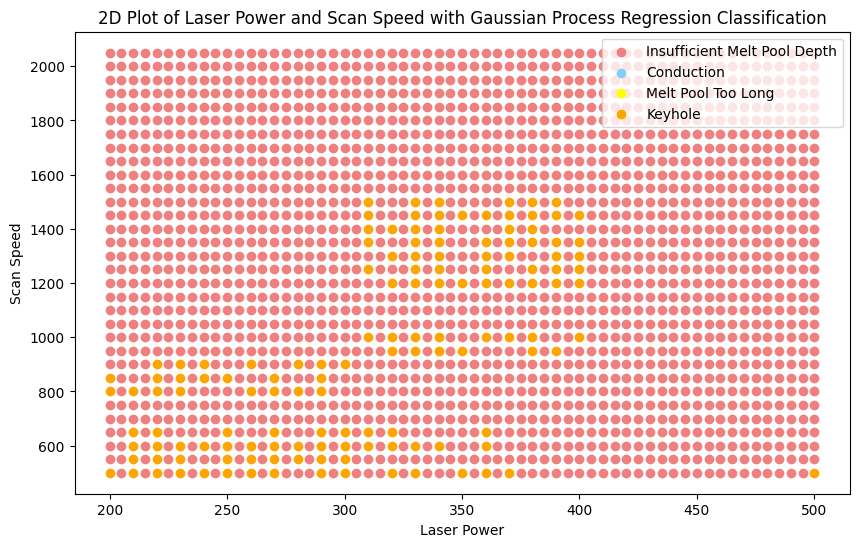

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Load the data
file_path = '/content/sample_data/n.csv'
data = pd.read_csv(file_path)

# Extracting input and output variables
X = data[['Laser Power', 'Scan Speed', 'Layer Thickness']]
y_columns = ['Median Melt Pool Reference Depth', 'Median Melt Pool Length', 'Median Melt Pool Reference Width']
y = data[y_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Initialize the Gaussian Process Regressor
kernel = RBF() + WhiteKernel()
gpr_regressor = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the model
gpr_regressor.fit(X_train, y_train)

# Make predictions
gpr_pred, gpr_pred_std = gpr_regressor.predict(X_test, return_std=True)

# Calculate mean squared error
mse = mean_squared_error(y_test, gpr_pred)
print("Mean squared error:", mse)

# Load the new test data
test_data = pd.read_csv("/content/sample_data/test1.csv")

# Make predictions on the test data
gpr_predicted_output, _ = gpr_regressor.predict(test_data[['Laser Power', 'Scan Speed', 'Layer Thickness']], return_std=True)

# Create DataFrame with new input parameters and predicted melt pool dimensions
new_data_gpr = pd.DataFrame({
    'Laser Power': test_data['Laser Power'].values,
    'Scan Speed': test_data['Scan Speed'].values,
    'Layer Thickness': test_data['Layer Thickness'].values,
    'Predicted Depth': gpr_predicted_output[:, 0],  # Predicted melt pool depth
    'Predicted Length': gpr_predicted_output[:, 1],  # Predicted melt pool length
    'Predicted Width': gpr_predicted_output[:, 2]  # Predicted melt pool width
})

# Classify each data point
gpr_classifications = []
for i in range(len(test_data)):
    layer_thickness = test_data.iloc[i]['Layer Thickness']
    if gpr_predicted_output[i, 0] / layer_thickness < 0.0025:
        gpr_classifications.append("Insufficient Melt Pool Depth")
    else:
        depth_to_width_ratio = gpr_predicted_output[i, 0] / gpr_predicted_output[i, 2]
        if depth_to_width_ratio < 0.5:
            gpr_classifications.append("Conduction")
        else:
            if gpr_predicted_output[i, 1] / gpr_predicted_output[i, 2] > 2 * np.pi:
                gpr_classifications.append("Melt Pool Too Long")
            else:
                gpr_classifications.append("Keyhole")

# Add classification to the test data DataFrame
test_data['Classification'] = gpr_classifications

# Plotting
plt.figure(figsize=(10, 6))
colors = {'Insufficient Melt Pool Depth': 'lightcoral', 'Conduction': 'lightskyblue',
          'Melt Pool Too Long': 'yellow', 'Keyhole': 'orange'}

# Plot each point with its classification color
for i in range(len(test_data)):
    current_classification = test_data.iloc[i]['Classification']
    plt.scatter(test_data.iloc[i]['Laser Power'], test_data.iloc[i]['Scan Speed'], color=colors[current_classification])

# Set labels for axes
plt.xlabel('Laser Power')
plt.ylabel('Scan Speed')

# Set title for the plot
plt.title('2D Plot of Laser Power and Scan Speed with Gaussian Process Regression Classification')

# Show legend with color labels
for classification, color in colors.items():
    plt.scatter([], [], color=color, label=classification)
plt.legend()

# Show the plot
plt.show()